In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.drop(columns=['CustomerID', 'Gender'], inplace=True)

In [5]:
df.sample(5)

,Age,Annual Income (k$),Spending Score (1-100)
38,36,37,26
26,45,28,32
114,18,65,48
50,49,42,52
41,24,38,92


In [6]:
df.shape

(200, 3)

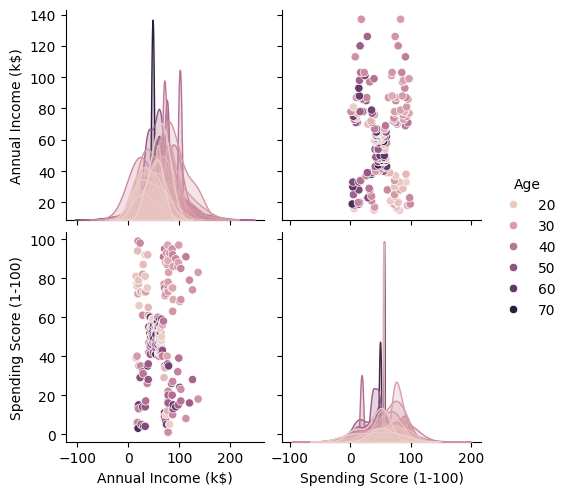

In [7]:
sns.pairplot(df, hue='Age')

In [8]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dfnew = sc.fit_transform(df)

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=10, n_init=100)
kmeans_fit = kmeans.fit(dfnew)

In [16]:
kmeans.labels_

array([2, 5, 2, 5, 2, 5, 2, 5, 4, 5, 4, 5, 4, 5, 2, 5, 2, 5, 4, 5, 2, 5,
       4, 5, 4, 5, 2, 5, 2, 5, 4, 5, 4, 5, 4, 5, 2, 5, 2, 5, 6, 5, 7, 1,
       4, 5, 7, 1, 1, 1, 7, 1, 1, 6, 7, 7, 7, 6, 1, 7, 6, 1, 6, 7, 6, 1,
       7, 6, 1, 1, 6, 7, 6, 6, 6, 1, 7, 7, 1, 7, 6, 7, 6, 7, 1, 7, 7, 1,
       1, 7, 6, 1, 7, 7, 1, 1, 7, 1, 7, 1, 1, 7, 6, 1, 7, 1, 6, 7, 6, 6,
       6, 1, 7, 1, 1, 1, 6, 7, 7, 7, 1, 7, 7, 3, 1, 3, 7, 3, 0, 3, 0, 3,
       1, 3, 8, 3, 0, 3, 8, 3, 0, 3, 1, 3, 8, 3, 0, 3, 8, 3, 0, 3, 0, 3,
       0, 3, 8, 3, 8, 3, 0, 3, 8, 3, 0, 3, 0, 3, 8, 3, 0, 3, 8, 3, 0, 3,
       0, 3, 0, 9, 8, 9, 0, 9, 0, 9, 0, 9, 0, 9, 8, 9, 8, 9, 0, 9, 0, 9,
       8, 9], dtype=int32)

In [17]:
len(kmeans.labels_)

200

In [22]:
#WCSS
kmeans_fit.inertia_

81.49835311864975

In [25]:
# finding best value of k

In [31]:
from sklearn.metrics import silhouette_score, silhouette_samples

# k=6
silhouette_score(dfnew, kmeans.labels_)

0.33547192894004574

In [32]:
# Tuning of hyper-parameters (K=1,2,3,..)
wcss = []
silhouette_scores=[]
k=15

for i in range(2, k+1):
    kmeans = KMeans(n_clusters=i, random_state=10, n_init=100)
    kmeans.fit(dfnew)
    wcss.append(kmeans.inertia_)
    score = silhouette_score(dfnew, kmeans.labels_)
    silhouette_scores.append(score)
    

In [33]:
optimal_k = pd.DataFrame({'k':range(2,k+1), 'WCSS':wcss, 'silhoutte_score':silhouette_scores})
optimal_k

,k,WCSS,silhoutte_score
0,2,389.386189,0.335472
1,3,295.212246,0.357793
2,4,205.225147,0.403958
3,5,168.247580,0.416643
4,6,133.868334,0.427428
5,7,117.011555,0.417232
6,8,103.788203,0.410089
7,9,92.071167,0.419973
8,10,81.498353,0.402107
9,11,71.961713,0.410312


<Axes: xlabel='k', ylabel='WCSS'>

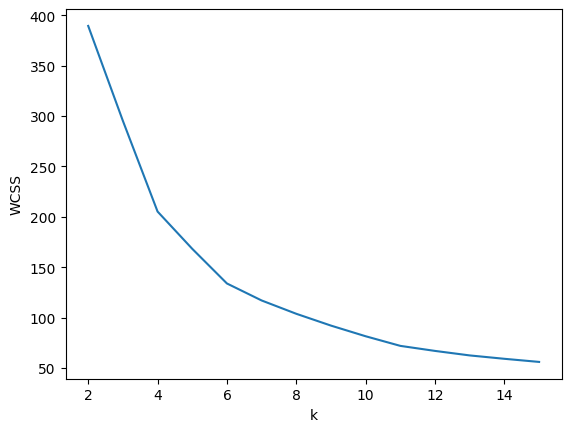

In [34]:
sns.lineplot(x='k', y='WCSS', data=optimal_k)

<Axes: xlabel='k', ylabel='silhoutte_score'>

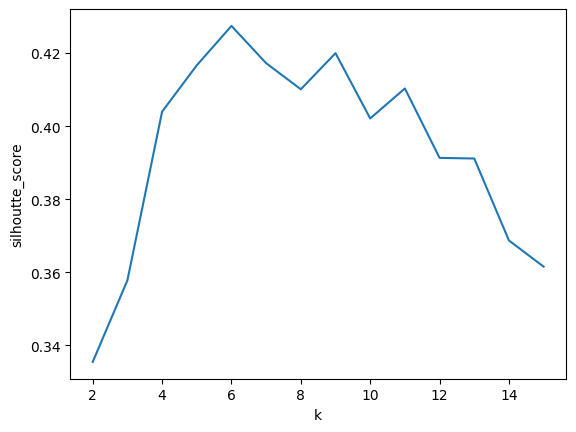

In [36]:
sns.lineplot(x='k', y='silhoutte_score', data=optimal_k)

In [38]:
# train model on k=6 that we got from Hyperparameter tuning
kmeans = KMeans(n_clusters=6, random_state=10, n_init=100)
kmeans_fit=(kmeans.fit(dfnew))

In [40]:
kmeans.labels_

array([0, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3, 0, 4, 0,
       4, 0, 3, 5, 5, 5, 3, 5, 5, 3, 3, 3, 3, 3, 5, 3, 3, 5, 3, 3, 3, 5,
       3, 3, 5, 5, 3, 3, 3, 3, 3, 5, 3, 5, 5, 3, 3, 5, 3, 3, 5, 3, 3, 5,
       5, 3, 3, 5, 3, 5, 5, 5, 3, 5, 3, 5, 5, 3, 3, 5, 3, 5, 3, 3, 3, 3,
       3, 5, 5, 5, 5, 5, 3, 3, 3, 3, 5, 5, 5, 2, 5, 2, 1, 2, 1, 2, 1, 2,
       5, 2, 1, 2, 1, 2, 5, 2, 1, 2, 5, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [41]:
df['cluster']=kmeans.labels_

In [42]:
df.sample(4)

,Age,Annual Income (k$),Spending Score (1-100),cluster
192,33,113,8,1
23,31,25,73,0
95,24,60,52,5
105,21,62,42,5


In [43]:
# Prediction for new customer
new_customer = pd.DataFrame({
    'Age':[20],
    'Annual Income (k$)':[3],
    'Spending Score (1-100)': [20]
})

In [44]:
new_customer

,Age,Annual Income (k$),Spending Score (1-100)
0,20,3,20


In [47]:
# Predict the cluster for the new customer
cluster = kmeans.predict(new_customer)
print('Predicted cluster for new customer: ', cluster[0])

Predicted cluster for new customer:  3
